In [13]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)

In [14]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

## 1. Cargar y Explorar Datos

In [15]:
# Cargar datos
df = pd.read_csv('data/2024_LoL_esports_match_data_from_OraclesElixir1.csv', sep=';')

print(f"Dimensiones: {df.shape}")
print(f"\nColumnas disponibles: {len(df.columns)}")
df.head()

Dimensiones: (12276, 123)

Columnas disponibles: 123


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,1,Blue,top,Zika,oe:player:65ed20b21e2993fb00dbd21a2fd991b,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,1,3,1,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,225.6204,0.169648,564.1463,NaN,14,0.4454,4,0.1273,5,24,0.7635,11083,6960,221.4210,0.237608,10784,NaN,279.0,256.0,23,16.0,0.0,8.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,2,Blue,jng,Weiwei,oe:player:57da8dfcfbdb4e5b019fe93003db1c4,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Maokai,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,0,4,3,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7361,234.1782,0.176101,847.4761,NaN,10,0.3181,12,0.3818,10,39,1.2407,8636,4513,143.5737,0.154069,8840,NaN,153.0,14.0,139,111.0,3.0,4.8674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,3,Blue,mid,Scout,oe:player:71e79ef80600d398d90cfebe3b0b758,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Orianna,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,0,2,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10005,318.2927,0.239355,432.2163,NaN,4,0.1273,8,0.2545,2,31,0.9862,10743,6620,210.6045,0.226000,10594,NaN,270.0,269.0,1,1.0,0.0,8.5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,4,Blue,bot,GALA,oe:player:867e8957fae1cb59f0808dbcc3aada2,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Kalista,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,2,4,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10892,346.5111,0.260563,491.4528,NaN,22,0.6999,13,0.4136,4,44,1.3998,12224,8101,257.7200,0.276

In [16]:
print("Equipos únicos:", df['teamname'].nunique())
print("Jugadores únicos:", df['playername'].nunique())
print("Campeones únicos:", df['champion'].nunique())
print("\nPosiciones:", df['position'].unique())
print("\nLados:", df['side'].unique())
print("\nResultados:", df['result'].value_counts())

Equipos únicos: 253
Jugadores únicos: 1304
Campeones únicos: 146

Posiciones: ['top' 'jng' 'mid' 'bot' 'sup' 'team']

Lados: ['Blue' 'Red']

Resultados: result
0    6138
1    6138
Name: count, dtype: int64


## 2. Preparar Dataset con TODAS las Features

Vamos a usar tanto información pre-game (equipos, jugadores, campeones) como in-game (kills, torres, etc.) para entrenar

In [17]:
# Seleccionar todas las columnas relevantes para entrenamiento
columnas_entrenamiento = [
    'gameid', 'teamname', 'playername', 'position', 'champion', 'side',
    'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths',
    'dragons', 'opp_dragons', 'elders', 'opp_elders',
    'barons', 'opp_barons', 'towers', 'opp_towers', 'totalgold',
    'result'
]

df_clean = df[columnas_entrenamiento].copy()
df_clean = df_clean.fillna(0)
df_clean['playername'] = df_clean['playername'].astype(str)
df_clean['champion'] = df_clean['champion'].astype(str)

print(f"Datos limpios: {df_clean.shape}")
df_clean.head()

Datos limpios: (12276, 21)


,gameid,teamname,playername,position,champion,side,kills,deaths,assists,teamkills,teamdeaths,dragons,opp_dragons,elders,opp_elders,barons,opp_barons,towers,opp_towers,totalgold,result
0,10660-10660_game_1,LNG Esports,Zika,top,Aatrox,Blue,1,3,1,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11083,0
1,10660-10660_game_1,LNG Esports,Weiwei,jng,Maokai,Blue,0,4,3,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8636,0
2,10660-10660_game_1,LNG Esports,Scout,mid,Orianna,Blue,0,2,0,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10743,0
3,10660-10660_game_1,LNG Esports,GALA,bot,Kalista,Blue,2,4,0,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12224,0
4,10660-10660_game_1,LNG Esports,Mark,sup,Senna,Blue,0,3,3,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7221,0


## 3. Crear Features Históricas (PRE-GAME)

Vamos a calcular estadísticas históricas para cada equipo, jugador y campeón:
- **Winrate por equipo** (% de victorias del equipo)
- **Winrate por jugador** (% de victorias del jugador)
- **KDA promedio por jugador** (kills + assists / deaths)
- **Winrate por campeón** (% de victorias con ese campeón)
- **Winrate jugador+campeón** (% de victorias del jugador con ese campeón específico)

In [18]:
# PASO 1: Calcular winrate histórico por EQUIPO
team_stats = df_clean.groupby('teamname').agg({
    'result': ['mean', 'count']
}).reset_index()
team_stats.columns = ['teamname', 'team_winrate', 'team_games']

print("="*70)
print("WINRATE POR EQUIPO (Top 10)")
print("="*70)
print(team_stats.sort_values('team_winrate', ascending=False).head(10))
print(f"\nTotal de equipos: {len(team_stats)}")

WINRATE POR EQUIPO (Top 10)
                         teamname  team_winrate  team_games
6    Anorthosis Famagusta Esports           1.0          24
12                  Atleta Esport           1.0          30
54                    EGN Esports           1.0          36
59                       Entropiq           1.0          30
90                 Geekay Esports           1.0          12
107         Invictus Gaming Young           1.0          12
112        Ji Jie Hao (é›†ç»“å·)           1.0          24
82                    GAM Esports           1.0          48
116                KaBuM! Academy           1.0           6
158             Nigma Galaxy Male           1.0          12

Total de equipos: 253


In [19]:
# PASO 2: Calcular winrate y KDA promedio por JUGADOR
player_stats = df_clean.groupby('playername').agg({
    'result': ['mean', 'count'],
    'kills': 'mean',
    'deaths': 'mean',
    'assists': 'mean'
}).reset_index()

player_stats.columns = ['playername', 'player_winrate', 'player_games', 
                        'player_avg_kills', 'player_avg_deaths', 'player_avg_assists']

# Calcular KDA: (Kills + Assists) / Deaths
player_stats['player_kda'] = (player_stats['player_avg_kills'] + player_stats['player_avg_assists']) / (player_stats['player_avg_deaths'] + 1)

print("\n" + "="*70)
print("WINRATE Y KDA POR JUGADOR (Top 10 con mínimo 10 partidas)")
print("="*70)
print(player_stats[player_stats['player_games'] >= 10].sort_values('player_winrate', ascending=False)[
    ['playername', 'player_winrate', 'player_games', 'player_kda']
].head(10))
print(f"\nTotal de jugadores: {len(player_stats)}")


WINRATE Y KDA POR JUGADOR (Top 10 con mínimo 10 partidas)
     playername  player_winrate  player_games  player_kda
102         Bin        0.941176            17    3.186047
1129        Xun        0.941176            17    4.600000
736          ON        0.941176            17    6.111111
291         Elk        0.941176            17    3.854167
1226     knight        0.941176            17    4.020000
836    RayFarky        0.937500            16    3.073171
59         Aria        0.937500            16    5.512821
410        Harp        0.937500            16    3.677966
981       Steal        0.937500            16    3.258621
1151    Yutapon        0.937500            16    5.394737

Total de jugadores: 1305


In [20]:
# PASO 3: Calcular winrate por CAMPEÓN
champion_stats = df_clean.groupby('champion').agg({
    'result': ['mean', 'count']
}).reset_index()
champion_stats.columns = ['champion', 'champion_winrate', 'champion_games']

print("\n" + "="*70)
print("WINRATE POR CAMPEÓN (Top 10 con mínimo 20 partidas)")
print("="*70)
print(champion_stats[champion_stats['champion_games'] >= 20].sort_values('champion_winrate', ascending=False).head(10))
print(f"\nTotal de campeones: {len(champion_stats)}")


WINRATE POR CAMPEÓN (Top 10 con mínimo 20 partidas)
    champion  champion_winrate  champion_games
23    Darius          0.761905              21
49      Jinx          0.666667              27
47     Jayce          0.649123              57
18   Caitlyn          0.617021              47
115  Taliyah          0.608108              74
90      Pyke          0.583333              24
73    Maokai          0.581325             332
79      Nami          0.581197             117
66    Lillia          0.575758              33
102    Senna          0.568528             197

Total de campeones: 147


In [21]:
# PASO 4: Calcular winrate por JUGADOR + CAMPEÓN (maestría)
player_champion_stats = df_clean.groupby(['playername', 'champion']).agg({
    'result': ['mean', 'count']
}).reset_index()
player_champion_stats.columns = ['playername', 'champion', 'player_champ_winrate', 'player_champ_games']

print("\n" + "="*70)
print("MAESTRÍA: Mejores combinaciones JUGADOR + CAMPEÓN (mín 10 partidas)")
print("="*70)
print(player_champion_stats[player_champion_stats['player_champ_games'] >= 5].sort_values('player_champ_winrate', ascending=False).head(10))
print(f"\nTotal de combinaciones: {len(player_champion_stats)}")


MAESTRÍA: Mejores combinaciones JUGADOR + CAMPEÓN (mín 10 partidas)
       playername  champion  player_champ_winrate  player_champ_games
52            665        Vi                   1.0                   5
590   BrokenBlade   K'Sante                   1.0                   5
493           Bin   K'Sante                   1.0                   5
3654        Oddie    Maokai                   1.0                   5
3190      MISSING      Nami                   1.0                   5
2369       Iwandy  Nautilus                   1.0                   5
2976      Lehends     Milio                   1.0                   6
5609        Yagao      Azir                   1.0                   5
5592          Xun   Lee Sin                   1.0                   5
6238       shanji   K'Sante                   1.0                   5

Total de combinaciones: 6446


In [22]:
# PASO 5: Calcular winrate por LADO (Blue vs Red)
side_stats = df_clean.groupby('side').agg({
    'result': ['mean', 'count']
}).reset_index()
side_stats.columns = ['side', 'side_winrate', 'side_games']

print("\n" + "="*70)
print("WINRATE POR LADO")
print("="*70)
print(side_stats)


WINRATE POR LADO
   side  side_winrate  side_games
0  Blue      0.545455        6138
1   Red      0.454545        6138


## 4. Agregar Features al Dataset

Ahora vamos a agregar todas estas estadísticas históricas a cada jugador/partida

In [23]:
# Merge todas las estadísticas históricas al dataset
df_features = df_clean.copy()

# Agregar stats de equipo
df_features = df_features.merge(team_stats, on='teamname', how='left')

# Agregar stats de jugador
df_features = df_features.merge(player_stats, on='playername', how='left')

# Agregar stats de campeón
df_features = df_features.merge(champion_stats, on='champion', how='left')

# Agregar stats de jugador+campeón (maestría)
df_features = df_features.merge(player_champion_stats, on=['playername', 'champion'], how='left')

# Agregar stats de lado
df_features = df_features.merge(side_stats, on='side', how='left')

print("="*70)
print("DATASET CON FEATURES HISTÓRICAS")
print("="*70)
print(f"Dimensiones: {df_features.shape}")
print(f"\nNuevas columnas agregadas:")
nuevas_cols = ['team_winrate', 'team_games', 'player_winrate', 'player_games', 'player_kda',
               'champion_winrate', 'champion_games', 'player_champ_winrate', 'player_champ_games',
               'side_winrate', 'side_games']
for col in nuevas_cols:
    print(f"  - {col}")

# Mostrar ejemplo
print("\nEjemplo de datos con features:")
print(df_features[['playername', 'champion', 'teamname', 'player_winrate', 'player_kda', 'champion_winrate', 'team_winrate', 'result']].head(10))

DATASET CON FEATURES HISTÓRICAS
Dimensiones: (12276, 35)

Nuevas columnas agregadas:
  - team_winrate
  - team_games
  - player_winrate
  - player_games
  - player_kda
  - champion_winrate
  - champion_games
  - player_champ_winrate
  - player_champ_games
  - side_winrate
  - side_games

Ejemplo de datos con features:
  playername      champion     teamname  player_winrate  player_kda  \
0       Zika        Aatrox  LNG Esports        0.411765    1.980000   
1     Weiwei        Maokai  LNG Esports        0.411765    2.241379   
2      Scout       Orianna  LNG Esports        0.411765    2.080645   
3       GALA       Kalista  LNG Esports        0.411765    2.595745   
4       Mark         Senna  LNG Esports        0.400000    2.697674   
5     Xiaoxu        Rumble    Rare Atom        0.200000    1.760870   
6     naiyou          Rell    Rare Atom        0.200000    1.444444   
7      VicLa       LeBlanc    Rare Atom        0.200000    1.660000   
8      Assum         Varus    Rare Atom  

## 5. Preparar Features para Machine Learning

Ahora vamos a codificar variables categóricas y seleccionar features para el modelo

In [24]:
le_team = LabelEncoder()
le_player = LabelEncoder()
le_champion = LabelEncoder()
le_side = LabelEncoder()
le_position = LabelEncoder()

df_features['team_encoded'] = le_team.fit_transform(df_clean['teamname'])
df_features['player_encoded'] = le_player.fit_transform(df_clean['playername'])
df_features['champion_encoded'] = le_champion.fit_transform(df_clean['champion'])
df_features['side_encoded'] = le_side.fit_transform(df_clean['side'])
df_features['position_encoded'] = le_position.fit_transform(df_clean['position'])
print("="*70)
print("VARIABLES CODIFICADAS")
print("="*70)
print(f"  - {len(le_team.classes_)} equipos")
print(f"  - {len(le_player.classes_)} jugadores")
print(f"  - {len(le_champion.classes_)} campeones")
print(f"  - {len(le_side.classes_)} lados")
print(f"  - {len(le_position.classes_)} posiciones")

# Seleccionar SOLO features PRE-GAME (sin estadísticas in-game)
features_pregame = [
    # Identificadores codificados
    'team_encoded', 'player_encoded', 'champion_encoded', 'side_encoded', 'position_encoded',
    # Features históricas (calculadas antes del partido)
    'team_winrate', 'team_games',
    'player_winrate', 'player_games', 'player_kda',
    'champion_winrate', 'champion_games',
    'player_champ_winrate', 'player_champ_games',
    'side_winrate'
]

X = df_features[features_pregame]
y = df_features['result']

print(f"\n✓ Features PRE-GAME seleccionadas: {len(features_pregame)}")
print(f"✓ Total de muestras: {X.shape[0]}")
print(f"\nDistribución de clases:")
print(y.value_counts(normalize=True))

VARIABLES CODIFICADAS
  - 253 equipos
  - 1305 jugadores
  - 147 campeones
  - 2 lados
  - 6 posiciones

✓ Features PRE-GAME seleccionadas: 15
✓ Total de muestras: 12276

Distribución de clases:
result
0    0.5
1    0.5
Name: proportion, dtype: float64

✓ Features PRE-GAME seleccionadas: 15
✓ Total de muestras: 12276

Distribución de clases:
result
0    0.5
1    0.5
Name: proportion, dtype: float64


## 6. Dividir Train/Test y Entrenar Modelo

In [25]:
# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

# Entrenar Random Forest
modelo = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)

# Predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)
y_proba_test = modelo.predict_proba(X_test)

# Métricas
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print("\n" + "="*70)
print("RESULTADOS DEL MODELO PRE-GAME")
print("="*70)
print(f"Precisión Train: {acc_train:.2%}")
print(f"Precisión Test: {acc_test:.2%}")

# Mostrar probabilidades
print("\n" + "="*70)
print("DISTRIBUCIÓN DE PROBABILIDADES (debería ser más realista)")
print("="*70)
print(f"Min probabilidad victoria: {y_proba_test[:, 1].min():.2%}")
print(f"Max probabilidad victoria: {y_proba_test[:, 1].max():.2%}")
print(f"Media probabilidad victoria: {y_proba_test[:, 1].mean():.2%}")
print(f"Std probabilidad victoria: {y_proba_test[:, 1].std():.4f}")

# Muestras de predicción
print("\n" + "="*70)
print("EJEMPLOS DE PREDICCIONES:")
print("="*70)
for i in range(10):
    prob_vic = y_proba_test[i][1] * 100
    prob_def = y_proba_test[i][0] * 100
    actual = "Victoria" if y_test.iloc[i] == 1 else "Derrota"
    pred = "Victoria" if y_pred_test[i] == 1 else "Derrota"
    print(f"Real: {actual:8} | Pred: {pred:8} | Derrota: {prob_def:5.1f}% | Victoria: {prob_vic:5.1f}%")

Train: (9820, 15)
Test: (2456, 15)

RESULTADOS DEL MODELO PRE-GAME
Precisión Train: 90.05%
Precisión Test: 77.16%

DISTRIBUCIÓN DE PROBABILIDADES (debería ser más realista)
Min probabilidad victoria: 0.00%
Max probabilidad victoria: 100.00%
Media probabilidad victoria: 49.54%
Std probabilidad victoria: 0.3868

EJEMPLOS DE PREDICCIONES:
Real: Derrota  | Pred: Derrota  | Derrota:  96.3% | Victoria:   3.7%
Real: Derrota  | Pred: Derrota  | Derrota:  95.6% | Victoria:   4.4%
Real: Victoria | Pred: Victoria | Derrota:  16.9% | Victoria:  83.1%
Real: Derrota  | Pred: Victoria | Derrota:  26.3% | Victoria:  73.7%
Real: Victoria | Pred: Victoria | Derrota:   0.4% | Victoria:  99.6%
Real: Victoria | Pred: Victoria | Derrota:   5.1% | Victoria:  94.9%
Real: Victoria | Pred: Victoria | Derrota:  44.7% | Victoria:  55.3%
Real: Derrota  | Pred: Derrota  | Derrota:  76.7% | Victoria:  23.3%
Real: Derrota  | Pred: Derrota  | Derrota:  87.4% | Victoria:  12.6%
Real: Derrota  | Pred: Derrota  | Derrota

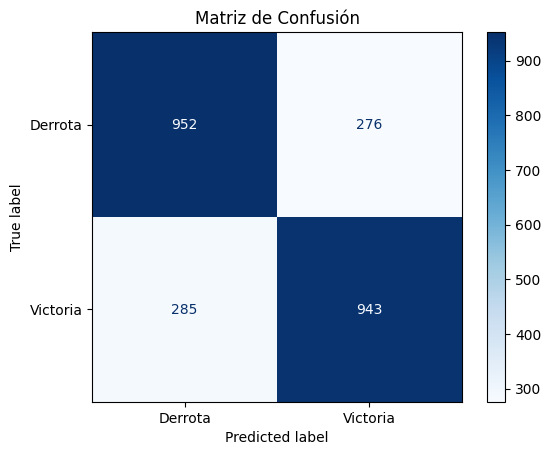


Reporte:
              precision    recall  f1-score   support

     Derrota       0.77      0.78      0.77      1228
    Victoria       0.77      0.77      0.77      1228

    accuracy                           0.77      2456
   macro avg       0.77      0.77      0.77      2456
weighted avg       0.77      0.77      0.77      2456



In [26]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Derrota', 'Victoria'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte:")
print(classification_report(y_test, y_pred_test, target_names=['Derrota', 'Victoria']))